In [2]:
import networkx as nx

# Básicos

## Agregar nodos y conexiones

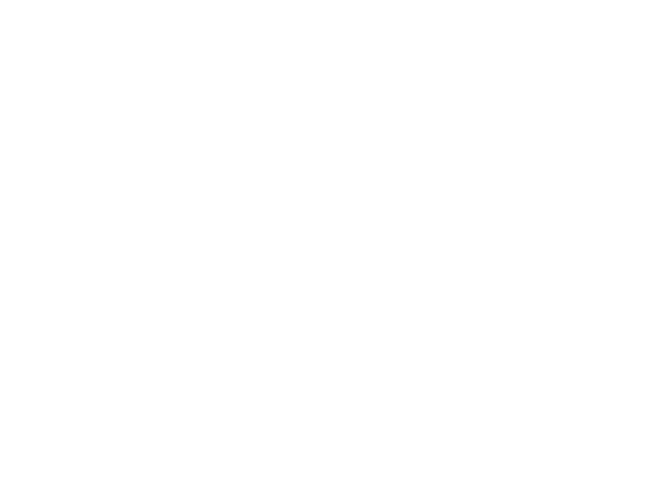

In [22]:
# Objeto graph y almacenado en una variable
G = nx.Graph()

# Grafica nuestro objeto
nx.draw(G)

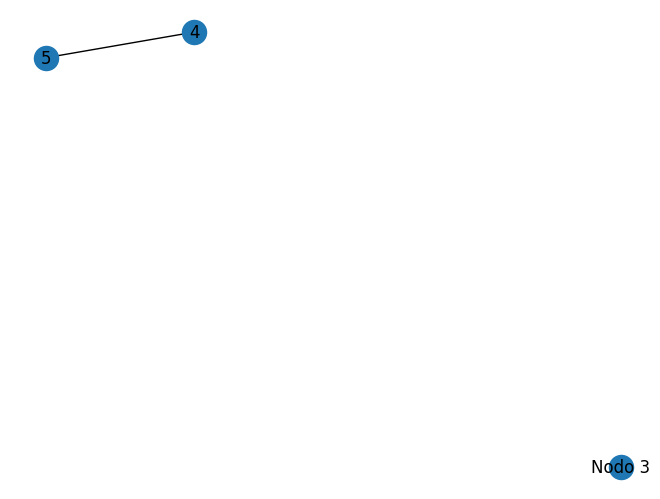

In [23]:
# Agregar un nodo
G.add_node(5)
G.add_node(4)
G.add_node("Nodo 3")

G.add_edge(5,4)

nx.draw(G, with_labels=True)

In [24]:
# Ver nodos de nuestro objeto
print(G.nodes)

# Ver los bordes de nuestro objeto
print(G.edges)

[5, 4, 'Nodo 3']
[(5, 4)]


In [25]:
G.degree

DegreeView({5: 1, 4: 1, 'Nodo 3': 0})

# Estructuras sencillas
## Red Lineal

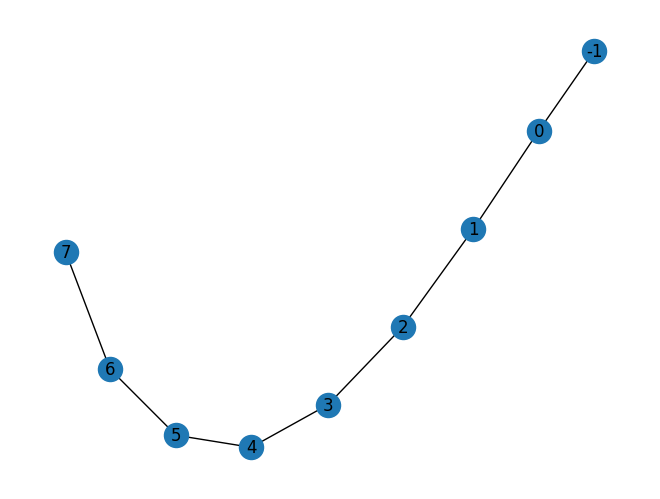

In [28]:
G = nx.Graph()

for i in range(5):
    G.add_node(i)

# Quiero una estrcutura lineal de 5 nodos
# Da lo mismo la conexión en este caso entonces puede ser i+1 o i-1
for i in range(8):
    G.add_edge(i, i-1)

nx.draw(G, with_labels=True)


## Red circular

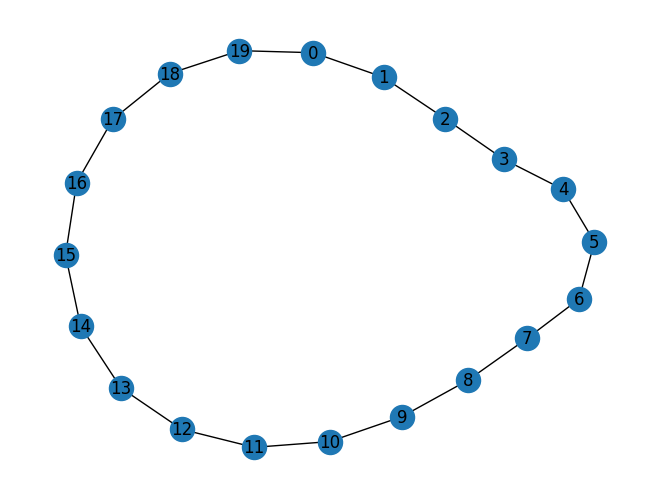

In [37]:
G = nx.Graph()
N = 20

for i in range(N):
    G.add_edge(i, (i+1)%N)

nx.draw(G, with_labels=True)


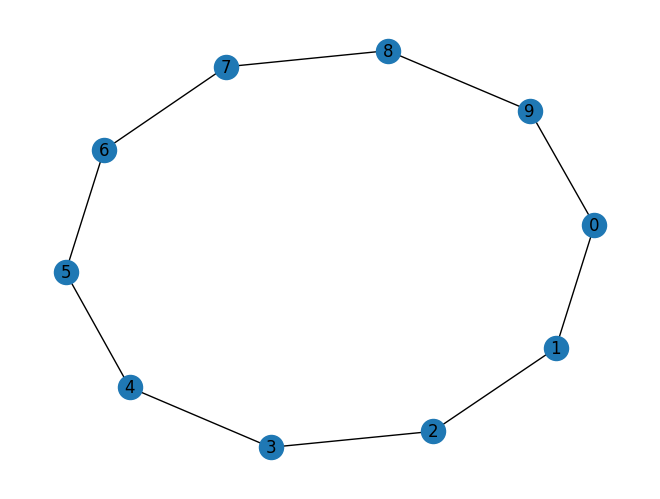

In [45]:
G = nx.Graph()
N = 10
nodos = list(range(N))
for i in range(N):
    G.add_node(i)

for i in range(N):
    G.add_edge(nodos[i], nodos[i-1])

nx.draw(G, with_labels=True)

 ## Red de anillos

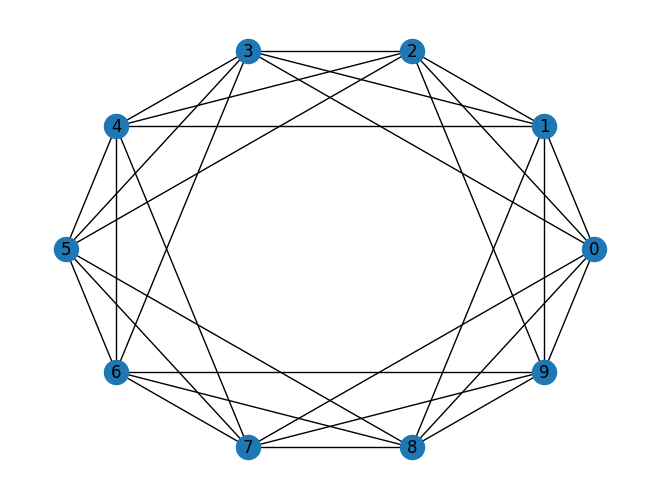

In [47]:
G = nx.Graph()
N = 10
nodos = list(range(N))
for i in range(N):
    G.add_node(i)

for i in range(N):
    G.add_edge(nodos[i], nodos[i-1])
    G.add_edge(nodos[i], nodos[i-2])
    G.add_edge(nodos[i], nodos[i-3])


# nx.draw(G, with_labels=True)
# Dibujar en forma cirular con los vecinos los nodos que tenemos
nx.draw_circular(G, with_labels=True)


## Red completa

0 0
0 1
0 2
0 3
0 4
0 5
0 6
1 1
1 2
1 3
1 4
1 5
1 6
2 2
2 3
2 4
2 5
2 6
3 3
3 4
3 5
3 6
4 4
4 5
4 6
5 5
5 6
6 6


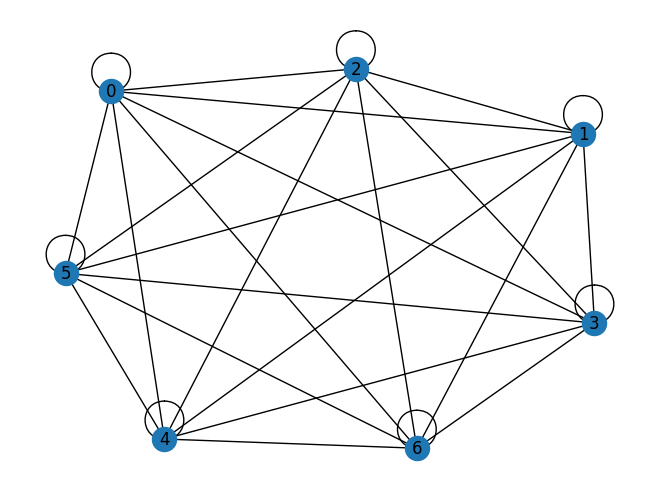

In [52]:
# Hay que evitar autoenlaces
G = nx.Graph()
N = 7
for i in range(N):
    G.add_node(i)

for i in range(N):
    for j in range(i,N):
        G.add_edge(i, j)

# Una buena manera de evitar autoenlaces es con el siguiente código
# Analizas los autoenlaces y lo resuelves
for i in range(N):
    for j in range(i,N):
        print(i, j)

nx.draw(G, with_labels=True)


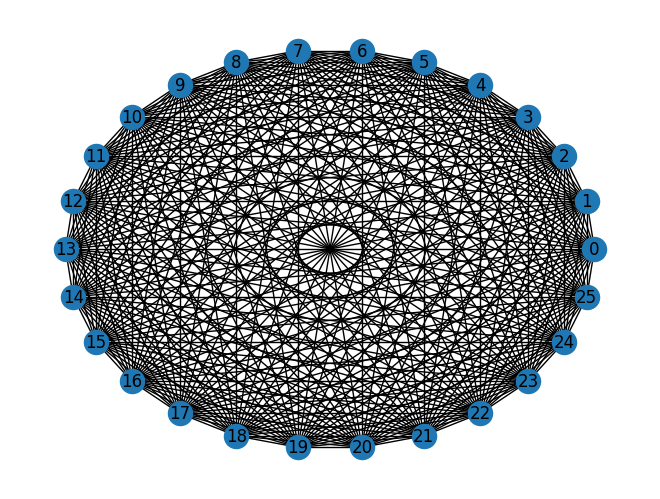

In [58]:
G = nx.Graph()
N = 26
for i in range(N):
    G.add_node(i)

for i in range(N):
    for j in range(i+1,N):
        G.add_edge(i, j)

nx.draw_circular(G, with_labels=True)

# Vectorización

In [3]:
import numpy as np

In [4]:
N = 10

nodos = np.arange(N)
print(nodos)

[0 1 2 3 4 5 6 7 8 9]


In [5]:
# zip es muy útil para hacer pares de elementos
print(list(zip(nodos[:-1], nodos[1:])))

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]


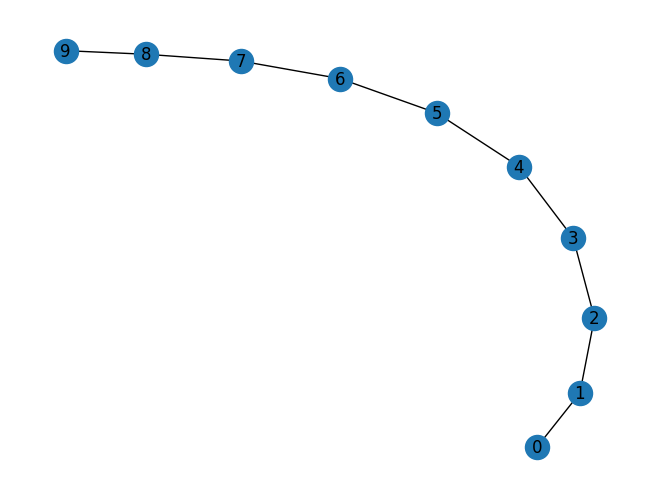

In [12]:
N = 10
nodos = np.arange(N)

G = nx.Graph()
G.add_edges_from(zip(nodos[:-1], nodos[1:]))
nx.draw(G, with_labels=True)

In [10]:
# El atributo de roll nos permite hacer un desplazamiento de los elementos
print(nodos)
print(np.roll(nodos,1))

[0 1 2 3 4 5 6 7 8 9]
[9 0 1 2 3 4 5 6 7 8]


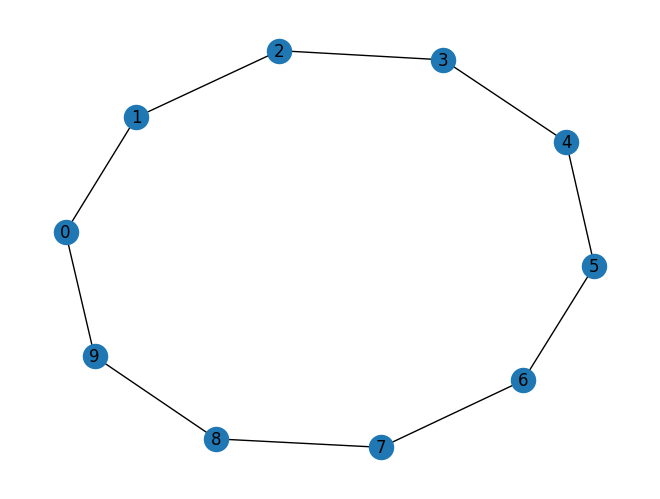

In [13]:
N = 10
nodos = np.arange(N)

G = nx.Graph()
G.add_edges_from(zip(nodos, np.roll(nodos,1)))

nx.draw(G, with_labels=True)

[(0, 19), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 18)]


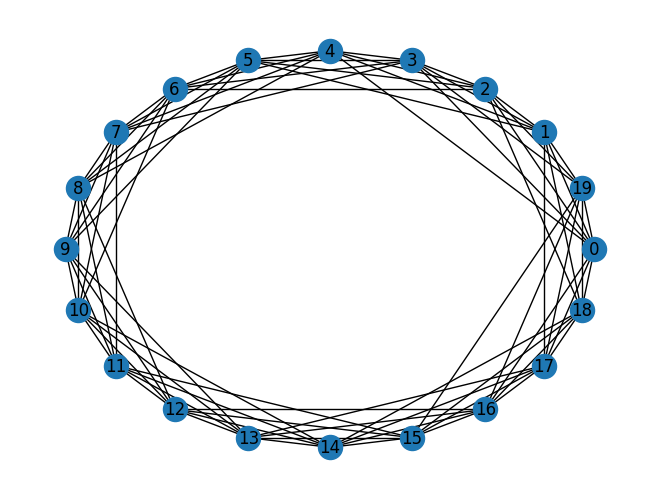

In [17]:
N = 20
nodos = np.arange(N)

G = nx.Graph()
G.add_edges_from(zip(nodos, np.roll(nodos,1)))
G.add_edges_from(zip(nodos, np.roll(nodos,2)))
G.add_edges_from(zip(nodos, np.roll(nodos,3)))
G.add_edges_from(zip(nodos, np.roll(nodos,4)))

nx.draw_circular(G, with_labels=True)

# Podemos notar que no ess completamente simétrico debido a que gráfica de manera tal
# de como se iban agregando los nodos

print(list(zip(nodos, np.roll(nodos,1))))

[(0, 19), (1, 0), (2, 1), (3, 2), (4, 3), (5, 4), (6, 5), (7, 6), (8, 7), (9, 8), (10, 9), (11, 10), (12, 11), (13, 12), (14, 13), (15, 14), (16, 15), (17, 16), (18, 17), (19, 18)]


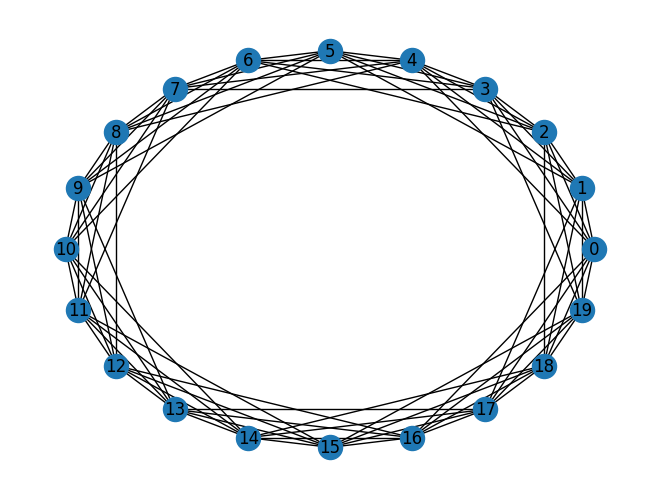

In [18]:
# Se arregla la simetría de la siguiente manera

N = 20
nodos = np.arange(N)

G = nx.Graph()
G.add_edges_from(zip(nodos, np.roll(nodos,-1)))
G.add_edges_from(zip(nodos, np.roll(nodos,-2)))
G.add_edges_from(zip(nodos, np.roll(nodos,-3)))
G.add_edges_from(zip(nodos, np.roll(nodos,-4)))

nx.draw_circular(G, with_labels=True)

print(list(zip(nodos, np.roll(nodos,1))))

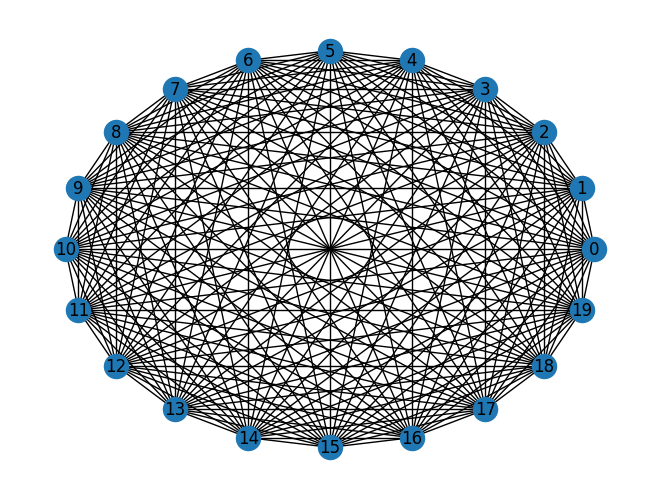

In [22]:
N = 20
nodos = np.arange(N)

G = nx.Graph()
G.add_nodes_from(nodos)
for i in range(N-1):
    G.add_edges_from(zip(nodos, np.roll(nodos,i+1)))
# for i in range(N/2):
#     G.add_edges_from(zip(nodos, np.roll(nodos,i+1)))

nx.draw_circular(G, with_labels=True)

# Funciones

## Función circular

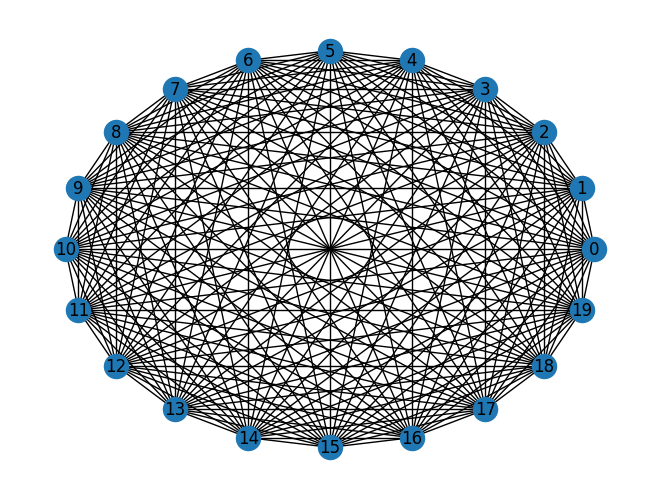

In [33]:
def circular(n):
    nodos = np.arange(n)
    G = nx.Graph()
    G.add_nodes_from(nodos)
    for i in range(n-1):
        G.add_edges_from(zip(nodos, np.roll(nodos,i+1)))
    nx.draw_circular(G, with_labels=True)
    return G
circular(20)

## Función lineal

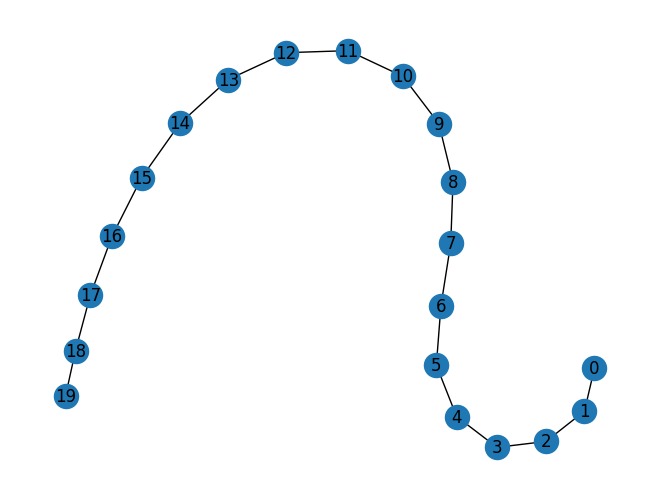

In [34]:
def linear(n):
    nodos = np.arange(n)
    G = nx.Graph()
    G.add_nodes_from(nodos)
    G.add_edges_from(zip(nodos[:-1], nodos[1:]))
    nx.draw(G, with_labels=True)
    return G

linear(20)

## Función anillo

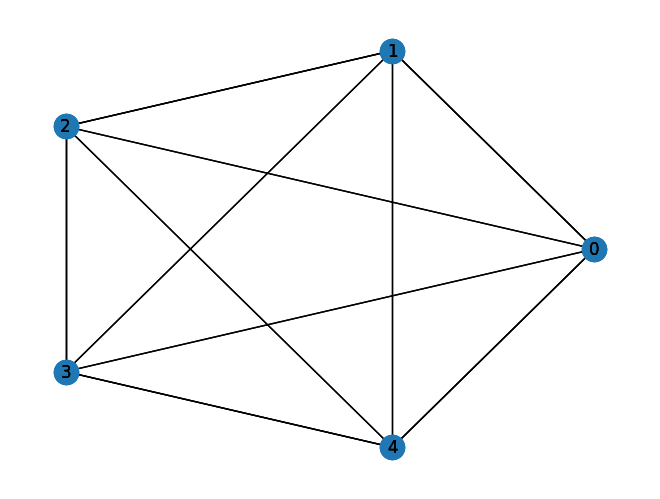

In [32]:
def anillos(n,k):
    nodos = np.arange(n)
    G = nx.Graph()
    G.add_nodes_from(nodos)

    for i in range(k):
        G.add_edges_from(zip(nodos, np.roll(nodos,i+1)))
        nx.draw_circular(G, with_labels=True)
    return G

anillos(5, 3)

# Representación en matrices

In [39]:
import matplotlib.pyplot as plt

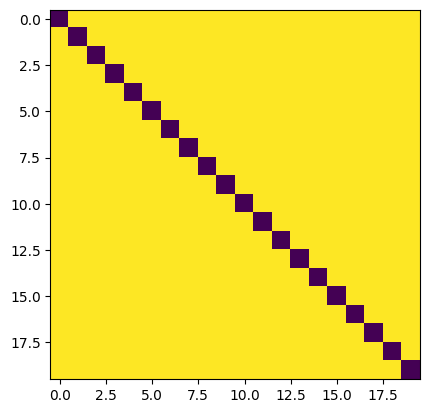

In [45]:
A = nx.to_numpy_array(G)

plt.imshow(A)


[[0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


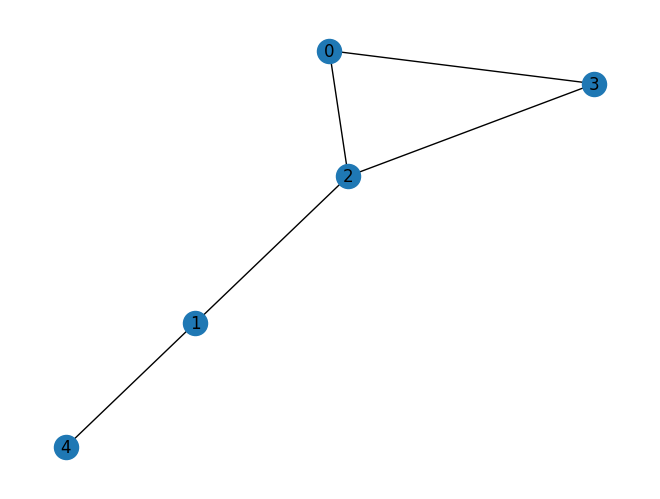

In [51]:
G = nx.Graph()

G.add_nodes_from(range(5))

G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(1,4)
G.add_edge(3,2)
G.add_edge(1,2)

A = nx.to_numpy_array(G)
print(A)
nx.draw(G, with_labels=True)

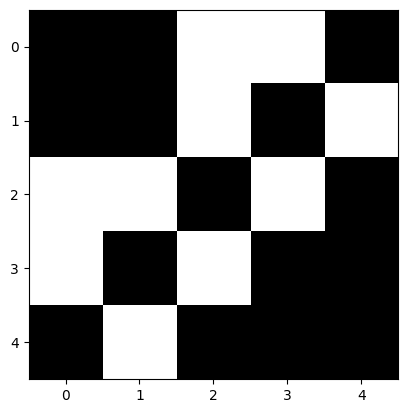

In [50]:
plt.imshow(A,cmap='gray')

[[0. 0. 1. 1. 0.]
 [0. 0. 3. 0. 1.]
 [1. 3. 0. 1. 0.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


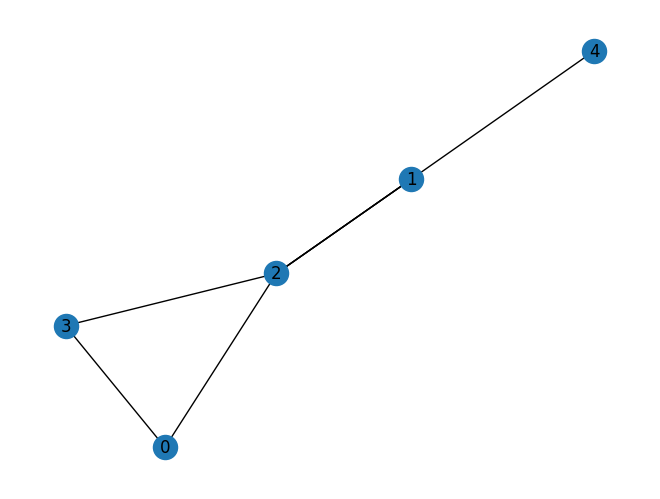

In [53]:
G = nx.MultiGraph()

G.add_nodes_from(range(5))

G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(1,4)
G.add_edge(3,2)
G.add_edge(1,2)
G.add_edge(1,2)
G.add_edge(1,2)

A = nx.to_numpy_array(G)
print(A)
nx.draw(G, with_labels=True)


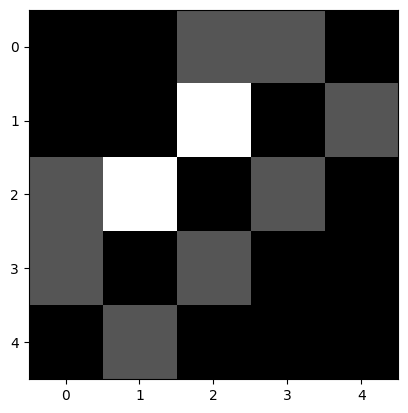

In [54]:
plt.imshow(A,cmap='gray')